In [1]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime

# basic computations
from scipy import stats

In [2]:
sog3600=xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/SOG_15jan2018_22jan2018/Lagrangian_AKNS_crude_SOG_15jan2018_22jan2018_AKNS_stokes.nc')
sog1200=xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/SOG_15jan2018_22jan2018b/Lagrangian_AKNS_crude_SOG_15jan2018_22jan2018_1200b.nc')

In [3]:
grid_z = np.arange(0,2,1)
grid_z

array([0, 1])

In [7]:
sog3600_surf_conc = sog3600.OilConcentration_3D[:,39,:,:]
sog1200_surf_conc = sog1200.OilConcentration_3D[:,39,:,:]
sog1200_surf_conc

<xarray.DataArray 'OilConcentration_3D' (time: 499, grid_y: 896, grid_x: 396)>
[177053184 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2018-01-15T00:30:00 2018-01-15T00:50:00 ...
  * grid_y   (grid_y) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * grid_x   (grid_x) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    grid_z   int16 39
Attributes:
    standard_name:  OilConcentration_3D
    long_name:      OilConcentration_3D
    units:          Kg/m3

In [8]:
sog3600_surf_conc_t = sog3600_surf_conc.sum(dim='time')
sog1200_surf_conc_t = sog1200_surf_conc.sum(dim='time')

/home/rmueller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


<function salishsea_tools.viz_tools.plot_coastline(axes, bathymetry, coords='grid', isobath=0, xslice=None, yslice=None, color='black', server='local', zorder=2)>

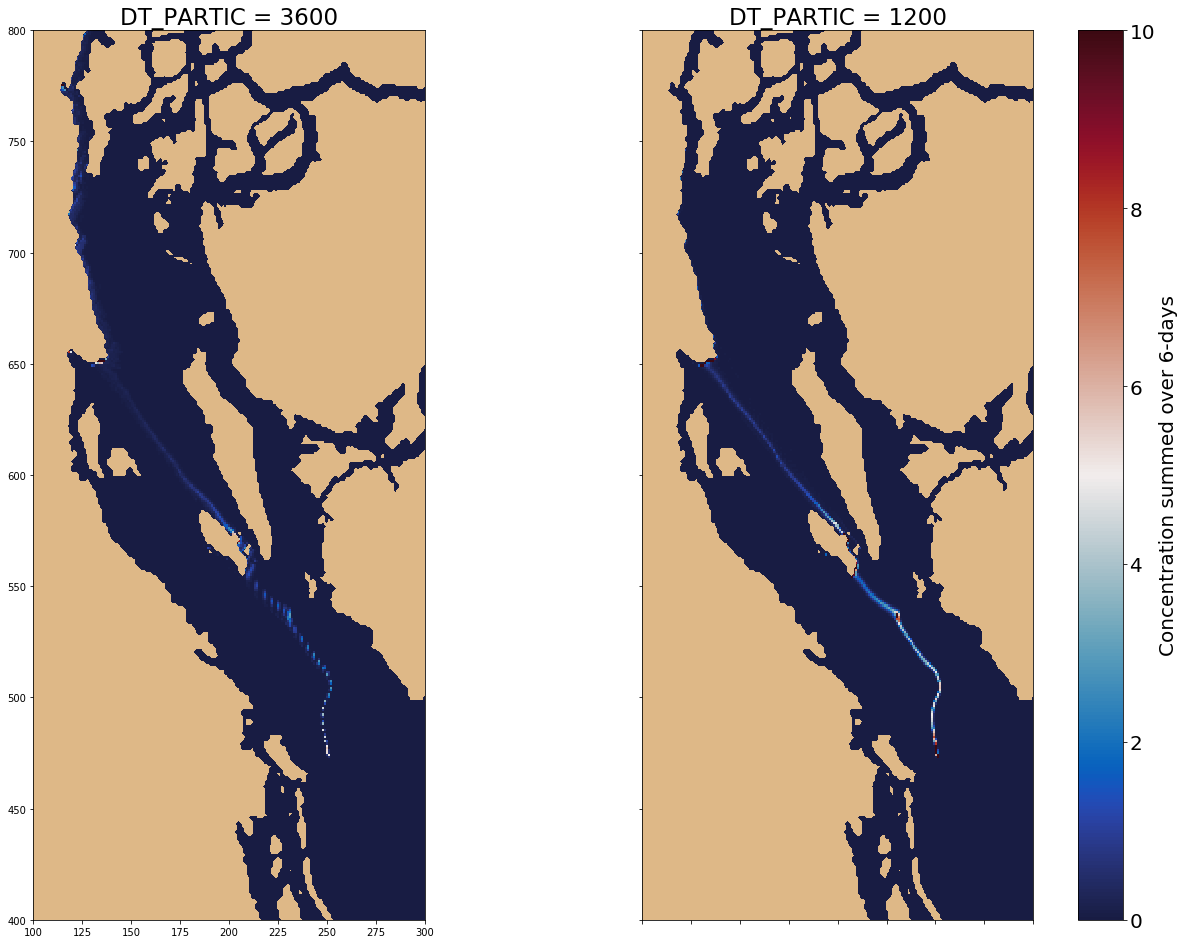

In [18]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(sog3600_surf_conc_t.values, vmin = 0, vmax = 10, cmap = cm.cm.balance)
mappable = ax2.pcolormesh(sog1200_surf_conc_t.values, vmin = 0, vmax = 10, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax2,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
ax1.set_xlim([100,300])
ax1.set_ylim([400,800])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('DT_PARTIC = OUTPUT_TIME = 3600', fontsize = 23)

# remove axis labelsand add titles for diesel graphic
viz_tools.set_aspect(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlim([100,300])
ax2.set_ylim([400,800])
#ax1.set_ylabel('test', fontsize = 20)
ax2.set_title('DT_PARTIC = OUTPUT_TIME = 1200', fontsize = 23)

# add
# add colorbar 
#cbar = fig.colorbar(mappable)
#cbar.set_label('thickness', fontsize = 20)
#cbar.ax.tick_params(labelsize = 20)

# remove the colorbar to have more control on sizing
#test = mappable.colorbar
#test.remove()

# adjust colorbar for AKNS graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Concentration summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)
cb.remove()

# adjust colorbar for diesel graphic
divider = make_axes_locatable(ax2)
c2 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c2)
cb.set_label('Concentration summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)

viz_tools.plot_coastline